In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [2]:
#normalize data to prevent explosion or vanishing of features
# for grayscale images the intensity range is from 0 - 255 
# so we map it between 0 and 1
#integer divided by integer gives integer so we put dot in the denominator and float in the numerator
x_test = x_test.astype('float32') / 255.
x_train = x_train.astype('float32') / 255.
m = x_train.shape[1]
print(x_test.shape) 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 

x_train = pd.read_csv("data1.csv") 
x_train = x_train.astype('float32')
x_train = x_train.dropna()
x_train.drop(['Class'], inplace=True, axis=1)


x_train, x_test = train_test_split(x_train, test_size=0.1)
x_train = x_train.values
x_test = x_test.values



In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 784/32 = 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(x_train.shape[1],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)
print(encoded) 
print(decoded) 
print(input_img)


Tensor("dense_1/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_2/Sigmoid:0", shape=(?, 784), dtype=float32)
Tensor("input_1:0", shape=(?, 784), dtype=float32)


In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.3576 - val_loss: 0.2707
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2636 - val_loss: 0.2527
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2422 - val_loss: 0.2292
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2209 - val_loss: 0.2105
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2056 - val_loss: 0.1980
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1949 - val_loss: 0.1888
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1868 - val_loss: 0.1818
Epoch 8/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1802 - val_loss: 0.1758
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1747 - val_loss: 0.1707
Epoch

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

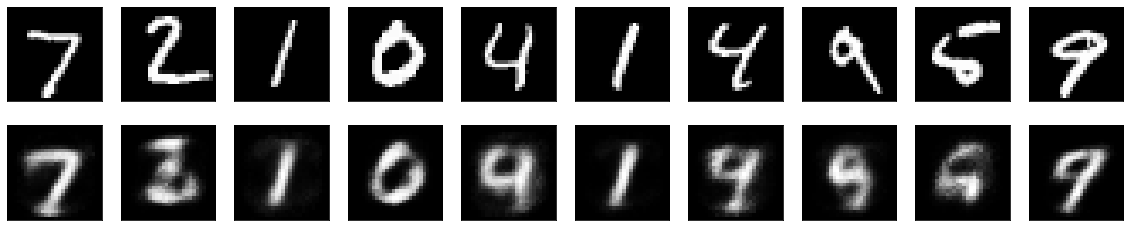

In [13]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(m, m))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(m, m))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
diff = decoded_imgs - x_test
mag = np.zeros(diff.shape[0])

In [ ]:
decoded_imgs [0,0]

In [ ]:
for i in range(diff.shape[0]):
    mag[i] = np.linalg.norm(diff[i])
    
new_mag = np.argsort(-mag, axis=0)
new_mag = new_mag.astype(int)

In [ ]:
new_mag

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    ii = new_mag[i]
    
    plt.imshow(x_test[ii].reshape(28, 28))
    plt.title(['Index:', ii])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[ii].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from resizeimage import resizeimage

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


cat_rgb=mpimg.imread('face.png')
cat_gray = rgb2gray(cat_rgb)

plt.imshow(cat_gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [ ]:
from PIL import Image
from resizeimage import resizeimage

x=Image.open('face.png','r')
x=x.convert('L') #makes it greyscale
x = resizeimage.resize_cover(x, [28, 28])
y=np.asarray(x.getdata(),dtype=np.float64).reshape((x.size[1],x.size[0]))


In [ ]:
yy = y.reshape(1, 784)

In [ ]:
encoded_imgs = encoder.predict(yy)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# display original
ax = plt.subplot(2, 1, 1)
plt.imshow(yy.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# display reconstruction
ax = plt.subplot(2, 1, 2)
plt.imshow(decoded_imgs.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

# Deep AutoEncoder

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]


In [ ]:
decoder = Model(encoded_input,  ( (decoder_layer2(decoder_layer1(encoded_input))) ) )

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()